## DATA LOAD

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from bokeh.layouts import column, row
from bokeh.plotting import figure, show
from bokeh.models import FactorRange, ColumnDataSource, Legend, LegendItem
from bokeh.io import output_file, save

In [4]:
# Loading the raw data
crime_data1 = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018_20250209.csv")
crime_data2 = pd.read_csv("Police_Department_Incident_Reports__2018_to_Present_20250209.csv")

In [5]:
# Converting to pandas
df1 = pd.DataFrame(crime_data1)
df2 = pd.DataFrame(crime_data2)

In [6]:
# Filtering for the needed data
df1 = df1.loc[:,["Category", "Time", "Date", "X", "Y"]]
df2 = df2.loc[:,["Incident Category", "Incident Time", "Incident Date", "Latitude", "Longitude"]]

In [7]:
# Assigning the same column labels for the two datasets
df2 = df2.rename(columns={"Incident Category":"Category",
                          "Incident Time":"Time",
                          "Incident Date":"Date",
                         "Latitude":"Y",
                         "Longitude":"X"})

In [8]:
# Making the category names upper case
df1["Category"] = df1["Category"].str.upper()
df2["Category"] = df2["Category"].str.upper()

In [9]:
# Setting the datetime in the same format
df1["Date"] = pd.to_datetime(df1["Date"], format="%m/%d/%Y")
df2["Date"] = pd.to_datetime(df2["Date"], format='%Y/%m/%d')

In [10]:
# Aligning category names
rename_dict = {
    "CIVIL SIDEWALKS": "LOITERING",
    "DRUG OFFENSE": "DRUG/NARCOTIC",
    "DRUG VIOLATION": "DRUG/NARCOTIC",
    "FIRE REPORT": "ARSON",
    "FORGERY AND COUNTERFEITING": "FORGERY/COUNTERFEITING",
    "HUMAN TRAFFICKING (A), COMMERCIAL SEX ACTS": "SEX OFFENSES, FORCIBLE",
    "HUMAN TRAFFICKING (B), INVOLUNTARY SERVITUDE": "EXTORTION",
    "HUMAN TRAFFICKING, COMMERCIAL SEX ACTS": "SEX OFFENSES, FORCIBLE",
    "LOST PROPERTY": "OTHER OFFENSES",
    "MALICIOUS MISCHIEF": "VANDALISM",
    "MISCELLANEOUS INVESTIGATION": "OTHER OFFENSES",
    "MOTOR VEHICLE THEFT": "VEHICLE THEFT",
    "MOTOR VEHICLE THEFT?": "VEHICLE THEFT",
    "OFFENCES AGAINST THE FAMILY AND CHILDREN": "FAMILY OFFENSES",
    "OTHER": "OTHER OFFENSES",
    "OTHER MISCELLANEOUS": "OTHER OFFENSES",
    "RAPE": "SEX OFFENSES, FORCIBLE",
    "SEX OFFENSE": "SEX OFFENSES, NON FORCIBLE",
    "TRAFFIC VIOLATION ARREST": "DRIVING UNDER THE INFLUENCE",
    "VEHICLE IMPOUNDED": "VEHICLE THEFT",
    "VEHICLE MISPLACED": "VEHICLE THEFT",
    "WARRANT": "WARRANTS",
    "WEAPONS CARRYING ETC": "WEAPON LAWS",
    "WEAPONS OFFENCE": "WEAPON LAWS",
    "WEAPONS OFFENSE": "WEAPON LAWS",
    "SUSPICIOUS": "SUSPICIOUS OCC",
    "LARCENY THEFT" : "LARCENY/THEFT"
}

df2["Category"] = df2["Category"].replace(rename_dict)

In [11]:
df1["Hour"] = df1["Time"].str.split(":").str[0].astype(int)
df2["Hour"] = df2["Time"].str.split(":").str[0].astype(int)

In [12]:
# Merging the full dataframe
df = pd.concat([df1,df2])

In [13]:
# Filtering out incomplete 2025
df = df[df['Date'].dt.year != 2025]

In [14]:
# Removing nan from categories
df = df.dropna(subset=["Category"])

### DRUG DATA

In [16]:
#Only DRUG/NARCOTIC
df = df[df["Category"] == "DRUG/NARCOTIC"]

In [17]:
df.loc[:,"Year"] = df["Date"].dt.year

In [18]:
df

,Category,Time,Date,X,Y,Hour,Year
18,DRUG/NARCOTIC,20:25,2003-06-12,-122.441875,37.719082,20,2003
31,DRUG/NARCOTIC,01:15,2006-01-03,-122.414433,37.784658,1,2006
37,DRUG/NARCOTIC,00:01,2003-12-18,-122.412883,37.785353,0,2003
80,DRUG/NARCOTIC,09:20,2003-05-21,-122.413564,37.779514,9,2003
167,DRUG/NARCOTIC,11:59,2006-01-27,-122.442365,37.784875,11,2006
...,...,...,...,...,...,...,...
927140,DRUG/NARCOTIC,11:10,2020-11-14,-122.408836,37.800488,11,2020
927186,DRUG/NARCOTIC,05:59,2020-12-31,-122.426491,37.765774,5,2020
929365,DRUG/NARCOTIC,00:00,2022-01-01,-122.415375,37.774845,0,2022
929590,DRUG/NARCOTIC,08:31,2024-02-06,-122.412598,37.783932,8,2024


In [19]:
df_hour = df.groupby([df["Year"], df["Hour"]]).size().reset_index(name='Count')

In [20]:
df_hour = df_hour.pivot(index="Hour", columns="Year", values="Count")

In [21]:
df_hour = df_hour.apply(lambda x: x / x.sum() * 100, axis=0)

In [22]:
df_hour

Year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Hour,,,,,,,,,,,,,,,,,,,,,
0,3.352412,3.176062,3.138323,2.694845,2.123552,2.871858,3.279246,3.209385,3.293149,3.075947,...,3.981879,3.093765,3.950995,2.447552,2.827763,2.785628,2.225250,1.431981,3.469958,2.789231
1,1.901063,1.797386,1.480341,1.531924,1.602317,1.937849,2.412709,1.881363,1.837695,1.870937,...,2.694325,1.665873,2.358346,1.913876,1.942302,0.968914,1.271571,0.981172,1.094551,2.255639
2,1.655765,1.633987,1.018475,1.196467,0.926641,1.597416,2.174836,1.494024,1.426051,1.379420,...,1.979018,1.856259,1.776417,1.674641,1.313910,1.372628,1.498638,1.140281,1.257569,1.673539
3,1.114064,0.980392,1.054003,0.838645,0.646718,0.768156,1.180868,1.073484,0.823287,1.094023,...,1.359084,1.475488,1.715161,1.232978,1.056841,0.847800,1.180745,0.981172,0.791803,1.188455
4,0.817661,0.898693,0.639507,0.547915,0.617761,0.576117,0.628664,0.697211,1.087915,0.745204,...,1.049118,1.047120,1.041348,0.699301,0.599829,0.363343,0.590372,0.742509,0.605496,0.824642
5,0.388389,0.337010,0.201326,0.346640,0.357143,0.366620,0.263359,0.309872,0.455748,0.443951,...,0.429185,0.713946,0.918836,0.404858,0.685518,0.928543,0.681199,0.503845,0.302748,0.533592
6,0.746116,0.868056,1.207958,1.140557,1.341699,1.571229,1.155382,0.630810,0.808586,0.602505,...,1.692895,2.403617,1.531394,1.380199,1.999429,0.686314,1.544051,1.909308,1.164415,1.867572
7,1.941946,2.001634,3.387020,2.269932,2.586873,2.627444,3.372696,2.025232,2.117024,1.474552,...,2.956605,3.760114,3.614089,3.257269,4.055984,3.350828,4.768392,3.553434,2.258966,2.207131
8,3.587490,2.869690,3.896258,3.555854,3.542471,2.967877,3.738000,2.877379,3.072626,2.727129,...,3.981879,4.783436,3.705972,4.987118,3.970294,4.602342,3.315168,3.924688,2.887750,3.201552


In [23]:
#Bokeh requires strings for categories, so I convert the years to strings
df_hour.columns = df_hour.columns.astype(str)

### BOKEH PLOT

In [67]:
#Convert to Bokeh ColumnDataSource
#Must be reloaded before running the bokeh plot
source = ColumnDataSource(df_hour)

In [69]:
# Define hours as categorical x-axis
hours = [str(i) for i in range(24)]  # ['0', '1', ..., '23']

# Create figure
p = figure(
    x_range=FactorRange(*hours),
    title="Drug Related Crimes by hour",
    x_axis_label="Hour of the Day (0-23)",
    y_axis_label="Relative frequency [%]",
    width=1200,  # Width of the plot area
    height=600  # Height of the plot area
)

# Adjust title font size and style
p.title.text_font_size = "20pt"  # Increase title font size
p.title.text_font_style = "bold"  # Make title bold
p.title.text_font = "Arial"  # Change title font (optional)

# Adjust axis labels font size and style
p.xaxis.axis_label_text_font_size = "14pt"  # X-axis label size
p.yaxis.axis_label_text_font_size = "14pt"  # Y-axis label size
p.xaxis.axis_label_text_font_style = "normal"  # X-axis label style
p.yaxis.axis_label_text_font_style = "normal"  # Y-axis label style
p.xaxis.axis_label_text_font = "Arial"  # X-axis label font (optional)
p.yaxis.axis_label_text_font = "Arial"  # Y-axis label font (optional)

# Adjust tick labels font size
p.xaxis.major_label_text_font_size = "12pt"  # X-axis tick labels
p.yaxis.major_label_text_font_size = "12pt"  # Y-axis tick labels

# Dictionary to store bars
bar = {}
legend_items = []

# Define colors for the bars
colors = [
    "steelblue", "tomato", "forestgreen", "violet", "darkorange", "turquoise", "fuchsia", 
    "saddlebrown", "lightpink", "limegreen", "yellowgreen", "midnightblue", "firebrick", 
    "darkolivegreen", "indigo", "darkviolet", "goldenrod", "silver", "darkcyan", "brown", 
    "mediumorchid", "crimson", "chartreuse", "salmon"
]

# Create bars and store legend items
for indx, crime in enumerate(df_hour.columns):
    bar[crime] = p.vbar(
        x='Hour',
        top=crime,
        source=source,
        width=0.8,
        color=colors[indx % len(colors)],
        legend_label=crime,  # Needed for mute functionality
        muted_alpha=0,
        muted=True,
        alpha=0.5,
        line_color="black",  # Add edge lines with black color
        line_width=1
    )
    # Create a LegendItem for the separate legend
    legend_items.append(LegendItem(label=crime, renderers=[bar[crime]]))

# Remove the internal legend from the plot
p.legend.visible = False

# Create a separate legend and add it to the plot
legend = Legend(items=legend_items, title="Year")
legend.title_text_font_style = "bold"
legend.title_text_font = "Arial"
legend.title_text_font_size = "14pt"

legend.glyph_width = 14  # Reduce marker width
legend.glyph_height = 14  # Reduce marker height
#legend.ncols = 1
legend.click_policy = "mute"
p.add_layout(legend, 'right')  # Add legend outside plot area

# Create a layout with the plot
layout = row(p, sizing_mode="scale_width")

output_file("drug_per_hour.html")
#save(p)

# Display the plot
show(layout)

### TIME SERIES

In [61]:
df_year = df["Year"].value_counts().sort_index()

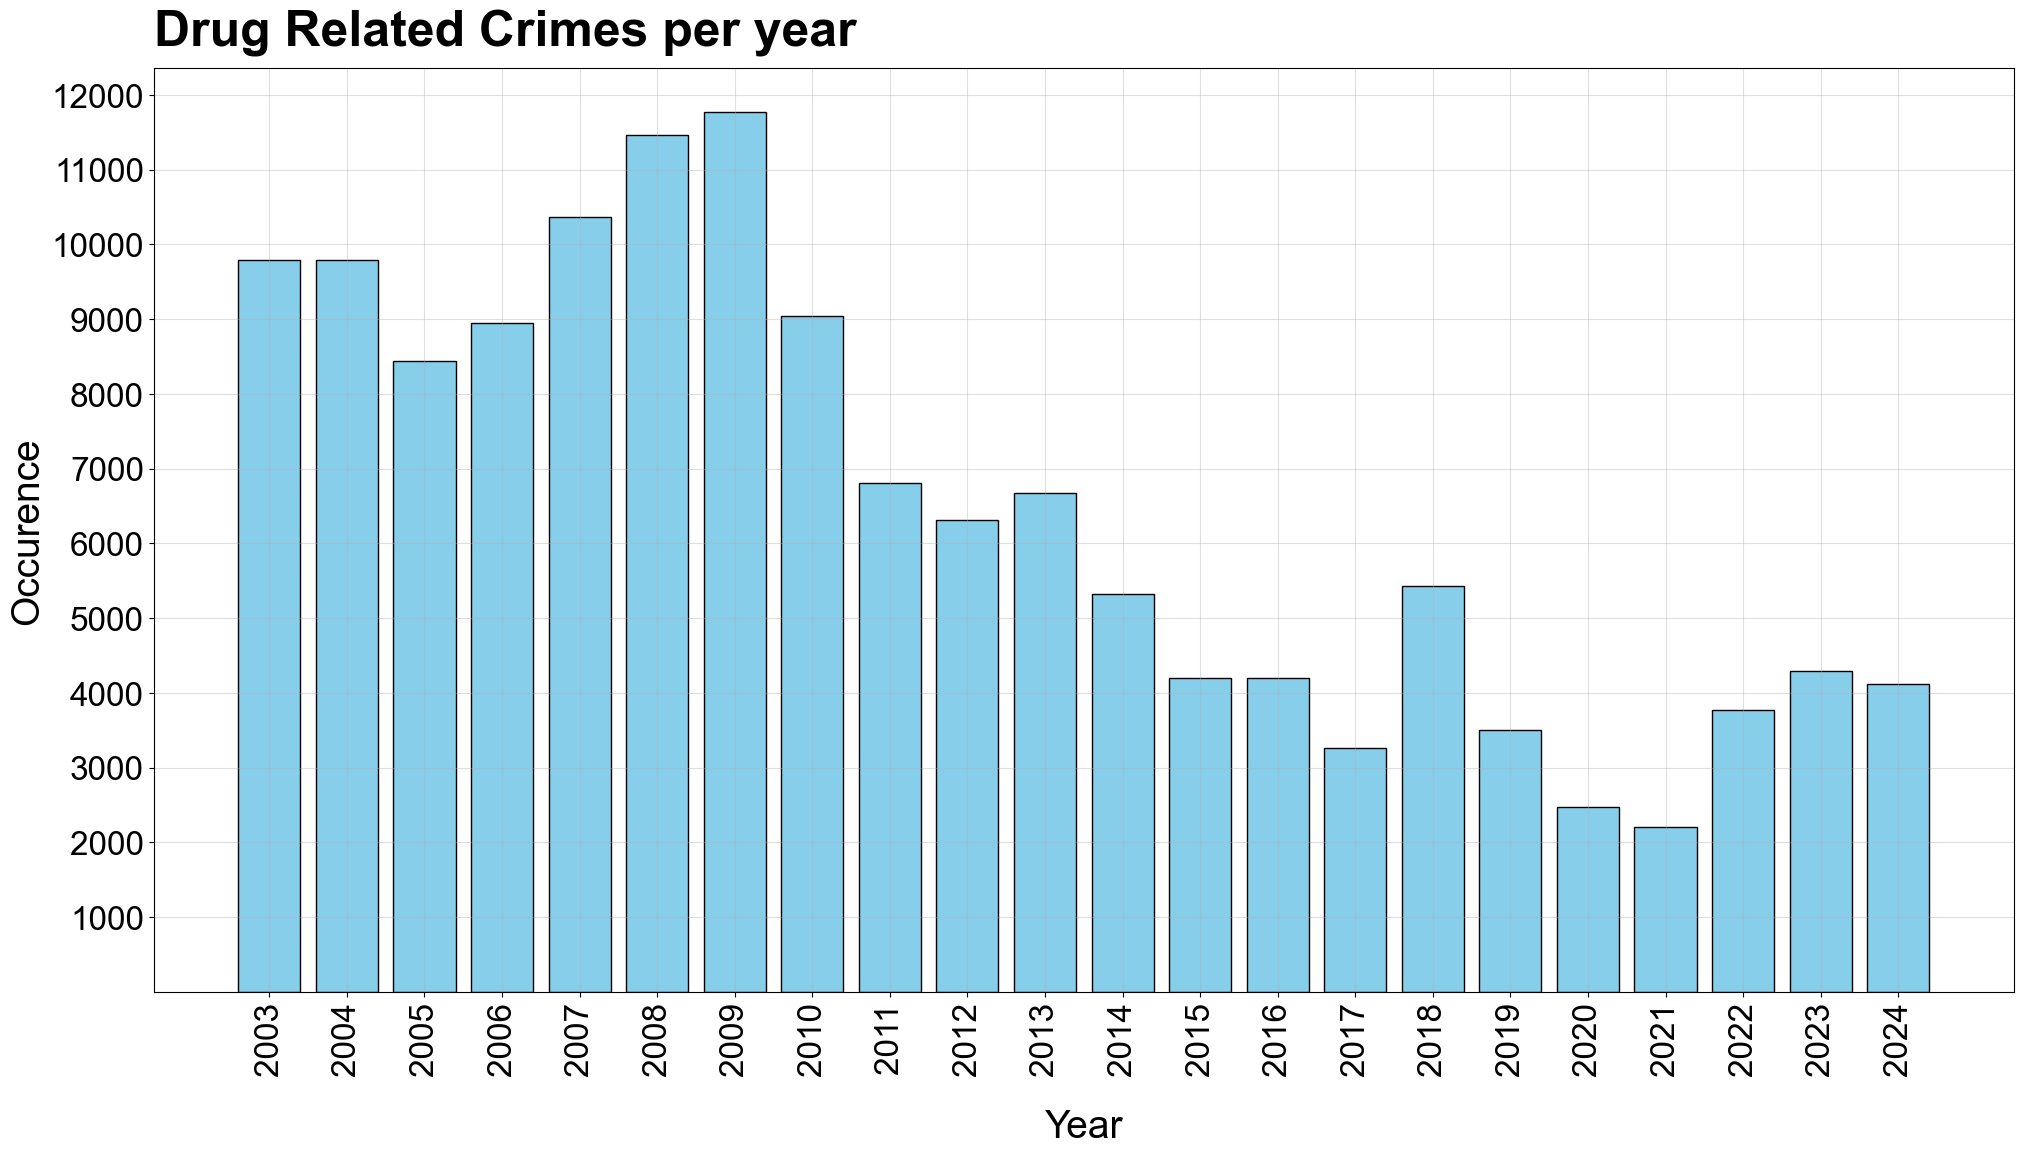

In [63]:
plt.figure(figsize=(24, 12))
plt.bar(df_year.index, df_year.values, color='skyblue', edgecolor="black", linewidth=1)  # Bar plot

plt.title("Drug Related Crimes per year", fontname="Arial", fontsize=36, fontweight='bold', loc="left", pad=16)  # Title of the plot

plt.xlabel("Year", fontname ="Arial", fontsize = 28, labelpad =24)
plt.xticks(df_year.index, fontname ="Arial", fontsize = 24, rotation = 90)

plt.ylabel("Occurence", fontname ="Arial", fontsize = 28)
plt.yticks([1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000], fontname ="Arial", fontsize = 24)

plt.grid(True, alpha=0.4)

plt.savefig("drug_per_year.png")

plt.show()